# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/ds4e/EDA`
### Do Q1 and two other questions.

**Q1.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
3. Show that $\text{cov}(a+bX,a+bX) = b^2 \text{cov}(X,X) $, and in particular that $\text{cov}(X,X) = s^2 $.
4. Instead of the mean, consider the median. Consider transformations that are non-decreasing (if $x\ge x'$, then $g(x)\ge g(x')$), like $2+5 \times X$ or $\text{arcsinh}(X)$. Is a non-decreasing transformation of the median the median of the transformed variable? Explain. Does your answer apply to any quantile? The IQR? The range? 


**Question 1 Responses**

[Image](IMG_7042.jpeg.pdf)

Calculations for questions 1-2^

4. When you apply a non-decreasing transformation to your data, the order of the data does not change. This means that the median of the transformed data is the same as applying the transformation to the median of the original data. The same is true for any quantile because the order is preserved. However, this property does not hold for measures like the IQR or the range. The IQR is the difference between two quantiles and the range is the difference between the maximum and minimum. When you transform the data, these differences do not change in a simple way unless the transformation is linear.
5. No, it is not always true that the mean of the transformed variable equals the transformation of the mean. A non-decreasing function keeps the order of the data, but it does not preserve sums or averages when it is not linear. For example, if you square the numbers, the average of the squares is not the same as the square of the average. The difference occurs because the mean is affected by the spread of the data. Therefore, $m(g(X))= g(m(X))$
is not true in all cases.

**Q2.** This question looks at financial transfers from foreign entities to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going? For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `./data/ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. Create a kernel density plot of the log of `Foreign Gift Amount`, and then a kernel density plot of the log of `Foreign Gift Amount` conditional on gift type. Do you notice any patterns?
5. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
6. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions. 
7. Which giftors provide the most money, in total?

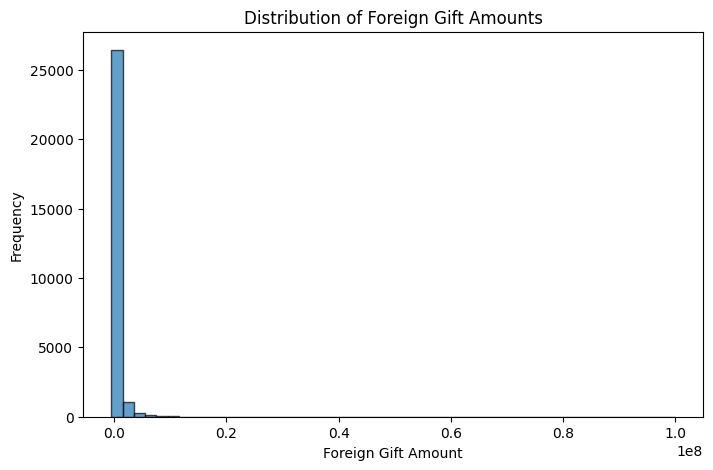

Gift Type
Contract         17274
Monetary Gift    10936
Real Estate         11
Name: count, dtype: int64


c:\Users\Sanket\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\Sanket\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


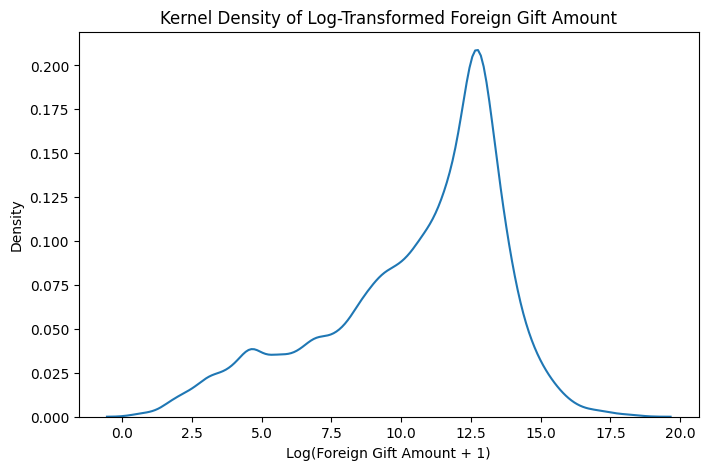

c:\Users\Sanket\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\Sanket\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Sanket\AppData\Local\Temp\ipykernel_24960\581415907.py:30: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x=np.log(df['Foreign Gift Amount'] + 1), hue='Gift Type', shade=True)


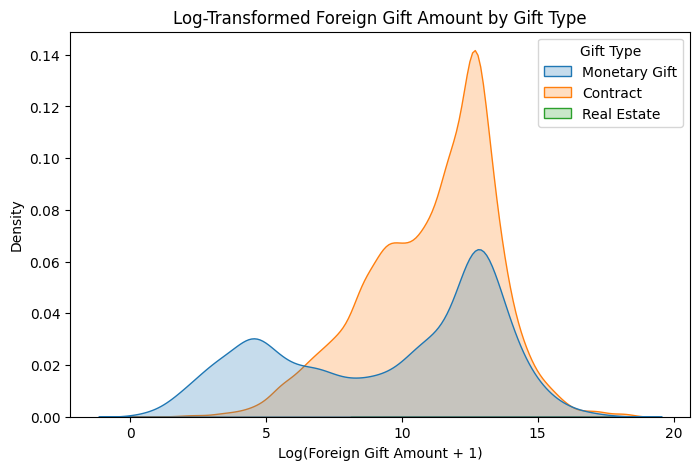


Top giftors by total amount provided:
Giftor Name
Qatar Foundation                       1166503744
Qatar Foundation/Qatar National Res     796197000
Qatar Foundation for Education          373945215
Anonymous                               338793629
Saudi Arabian Cultural Mission          275221475
HCL                                     190000000
Church of Jesus Christ of LDS           185203715
Emirates Institute for Advanced Sc      170641244
QIC                                     148355497
Anonymous #9                             96334996
Qatar National Research Fund             79021705
Government of Saudi Arabia               75192434
Contracting Party                        69996984
CMKL University                          67700000
Royal Embassy of Saudi Arabia            67062486
Name: Foreign Gift Amount, dtype: int64


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#part 1
df = pd.read_csv('./data/ForeignGifts_edu.csv')
df.head(10)

#part 2
plt.figure(figsize=(8,5))
plt.hist(df['Foreign Gift Amount'], bins=50, edgecolor='k', alpha=0.7)
plt.xlabel('Foreign Gift Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Foreign Gift Amounts')
plt.show()

#part 3
gift_type_counts = df['Gift Type'].value_counts()
print(gift_type_counts)

#part4
plt.figure(figsize=(8,5))
sns.kdeplot(np.log(df['Foreign Gift Amount'] + 1))
plt.xlabel('Log(Foreign Gift Amount + 1)')
plt.title('Kernel Density of Log-Transformed Foreign Gift Amount')
plt.show()

plt.figure(figsize=(8,5))
sns.kdeplot(data=df, x=np.log(df['Foreign Gift Amount'] + 1), hue='Gift Type', shade=True)
plt.xlabel('Log(Foreign Gift Amount + 1)')
plt.title('Log-Transformed Foreign Gift Amount by Gift Type')
plt.show()

#part 5
top_countries_by_count = df.groupby('Country of Giftor').size().nlargest(15)
top_countries_by_amount = df.groupby('Country of Giftor')['Foreign Gift Amount'].sum().nlargest(15)
# print("\nTop 15 countries by number of gifts:")
# print(top_countries_by_count)

print("\nTop 15 countries by total amount given:")
print(top_countries_by_amount)

#part 6
top_institutions = df.groupby('Institution Name')['Foreign Gift Amount'].sum().nlargest(15)

print("\nTop 15 institutions by total amount received:")
print(top_institutions)

total_amount_by_institution = df.groupby('Institution Name')['Foreign Gift Amount'].sum()
plt.figure(figsize=(10, 6))
plt.hist(total_amount_by_institution, bins=30, color='purple', edgecolor='black')
plt.title('Histogram of Total Amount Received by Institutions')
plt.xlabel('Total Foreign Gift Amount Received')
plt.ylabel('Frequency')
plt.show()

#part 7
top_giftors = df.groupby('Giftor Name')['Foreign Gift Amount'].sum().nlargest(15)

print("\nTop giftors by total amount provided:")
print(top_giftors)



**Question 2 Responses**

2. The histogram appears to be very skewed to the right. Most gifts seem to be relatively small, however, there is a long tail with a couple extremely large gifts.
3. 61.2% of the gifts are contracts, 38.8% are monetary gifts, and 0.04% are real estate gifts.
4.  After the log transformation, the overall distribution becomes more Gaussian and "bell-shaped-like". A pattern that I noticed is that contracts typically tend to cluster around a specific range of higher values more than monetary gifts, and monetary gifts are more spread out, meaning that they vary more in size. This means that contracts typically involve bigger sums than monetary gifts.
5. The top 15 countries by the number of gifts are led by England (3,655), followed by China (2,461), Canada (2,344), Japan (1,896), Switzerland (1,676), Saudi Arabia (1,610), France (1,437), Germany (1,394), Hong Kong (1,080), South Korea (811), Qatar (693), the Netherlands (512), Korea (452), India (434), and Taiwan (381).

The top 15 countries by total amount given are led by Qatar ($2,706,240,869), followed by England ($1,464,906,771), China ($1,237,952,112), Saudi Arabia ($1,065,205,930), Bermuda ($899,593,972), Canada ($898,160,656), Hong Kong ($887,402,529), Japan ($655,954,776), Switzerland ($619,899,445), India ($539,556,490), Germany ($442,475,605), the United Arab Emirates ($431,396,357), France ($405,839,396), Singapore ($401,157,692), and Australia ($248,409,202).

6. The top 15 institutions by total amount received are led by Carnegie Mellon University ($1,477,922,504), followed by Cornell University ($1,289,937,761), Harvard University ($954,803,610), the Massachusetts Institute of Technology ($859,071,692), Yale University ($613,441,311), Texas A&M University ($521,455,050), Johns Hopkins University ($502,409,595), Northwestern University ($402,316,221), Georgetown University ($379,950,511), the University of Chicago ($364,544,338), the University of Colorado Boulder ($360,173,159), Duke University ($343,699,498), Brigham Young University ($323,509,863), Stanford University ($319,561,362), and the University of Texas MD Anderson Cancer Center ($301,527,419).
7. The top giftors by total amount provided are led by the Qatar Foundation ($1,166,503,744), followed by Qatar Foundation/Qatar National Research Fund ($796,197,000), Qatar Foundation for Education ($373,945,215), Anonymous ($338,793,629), the Saudi Arabian Cultural Mission ($275,221,475), HCL ($190,000,000), the Church of Jesus Christ of Latter-day Saints ($185,203,715), the Emirates Institute for Advanced Science ($170,641,244), QIC ($148,355,497), Anonymous #9 ($96,334,996), the Qatar National Research Fund ($79,021,705), the Government of Saudi Arabia ($75,192,434), Contracting Party ($69,996,984), CMKL University ($67,700,000), and the Royal Embassy of Saudi Arabia ($67,062,486).








**Q3.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. This provides a dataset of AirBnB rental properties for New York City.  
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

**Q4.** This question looks at a time series of the number of active oil drilling rigs in the United States over time. The data comes from the Energy Information Agency.

1. Load `./data/drilling_rigs.csv` and examine the data. How many observations? How many variables? Are numeric variables correctly read in by Pandas, or will some variables have to be typecast/coerced? Explain clearly how these data need to be cleaned.
2. To convert the `Month` variable to an ordered datetime variable, use `df['time'] = pd.to_datetime(df['Month'], format='mixed')`.
3. Let's look at `Active Well Service Rig Count (Number of Rigs)`, which is the total number of rigs over time. Make a line plot of this time series. Describe what you see.
4. Instead of levels, we want to look at change over time. Compute the first difference of  `Active Well Service Rig Count (Number of Rigs)` and plot it over time. Describe what you see.
5. The first two columns are the number of onshore and offshore rigs, respectively. Melt these columns and plot the resulting series.

Number of observations: 623
Number of variables: 10
Month                                                                                           object
Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)                     int64
Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)                    int64
Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)                                     float64
Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)                                   float64
Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)     float64
Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)    float64
Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)       float64
Crude Oil and Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)                       int64
Active Well Service R

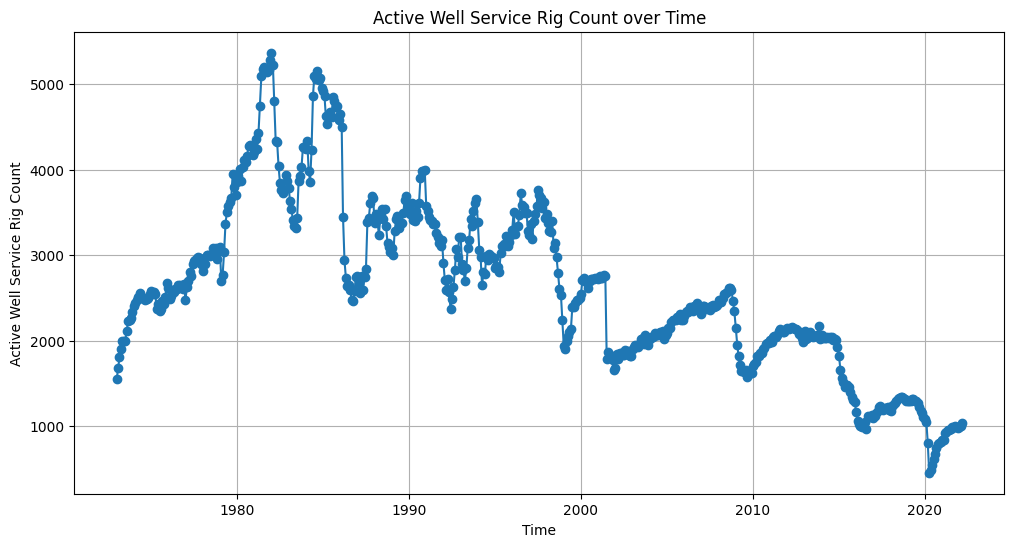

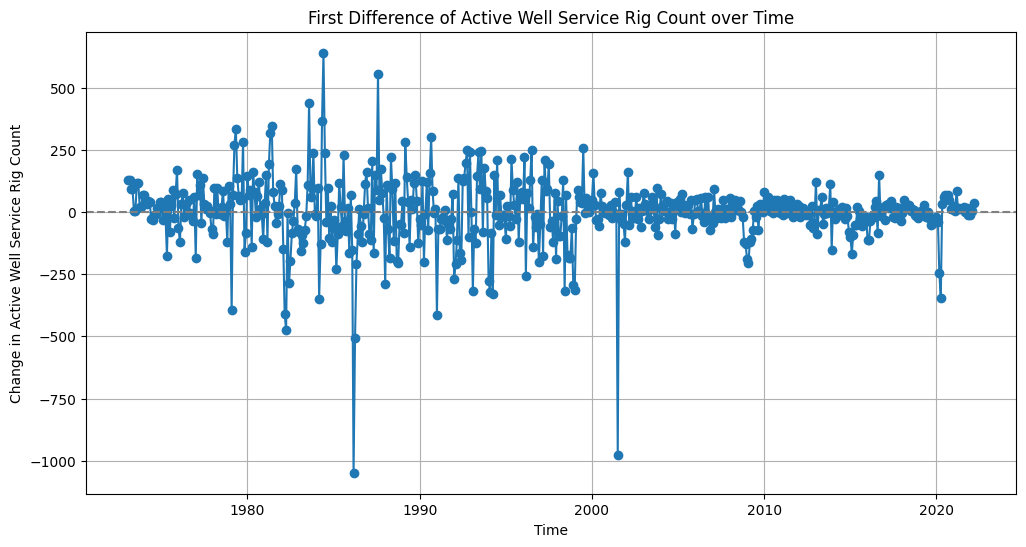

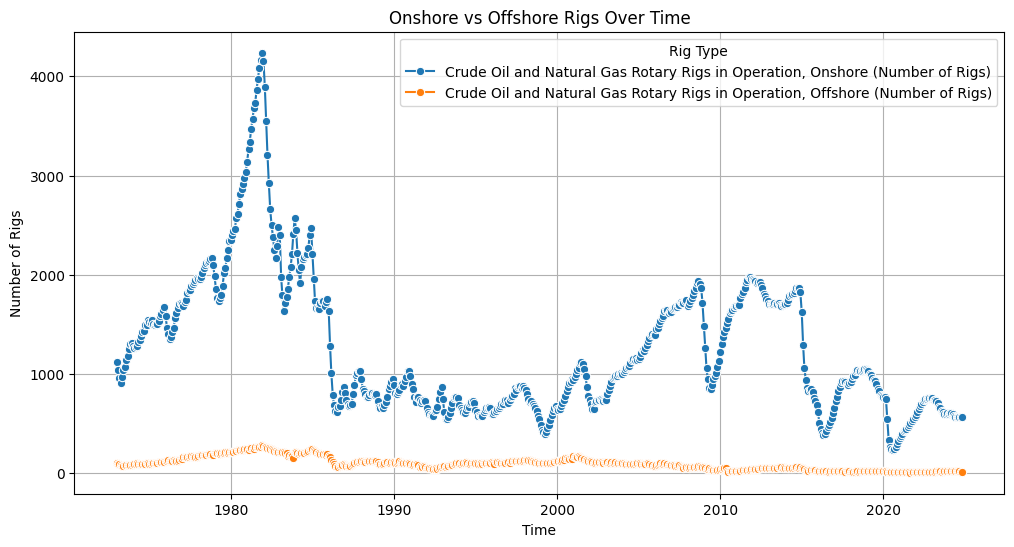

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#part 1
df = pd.read_csv('./data/drilling_rigs.csv', na_values=["Not Available"])
n_obs, n_vars = df.shape
print("Number of observations:", n_obs)
print("Number of variables:", n_vars)

print(df.dtypes)
print(df.info())

#part 2
df['time'] = pd.to_datetime(df['Month'], format='mixed')

#part 3
plt.figure(figsize=(12,6))
plt.plot(df['time'], df['Active Well Service Rig Count (Number of Rigs)'], marker='o', linestyle='-')
plt.xlabel('Time')
plt.ylabel('Active Well Service Rig Count')
plt.title('Active Well Service Rig Count over Time')
plt.grid(True)
plt.show()

#part 4
df['rig_diff'] = df['Active Well Service Rig Count (Number of Rigs)'].diff()

plt.figure(figsize=(12,6))
plt.plot(df['time'], df['rig_diff'], marker='o', linestyle='-')
plt.xlabel('Time')
plt.ylabel('Change in Active Well Service Rig Count')
plt.title('First Difference of Active Well Service Rig Count over Time')
plt.axhline(0, color='gray', linestyle='--')
plt.grid(True)
plt.show()

#part 5

melted = pd.melt(df, 
                 id_vars=['time'], 
                 value_vars=['Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)',
                             'Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)'],
                 var_name='RigType', 
                 value_name='Count')

melted['Count'] = pd.to_numeric(melted['Count'], errors='coerce')

plt.figure(figsize=(12,6))
sns.lineplot(data=melted, x='time', y='Count', hue='RigType', marker='o')
plt.xlabel('Time')
plt.ylabel('Number of Rigs')
plt.title('Onshore vs Offshore Rigs Over Time')
plt.legend(title='Rig Type')
plt.grid(True)
plt.show()


**Question 4 Responses**

1. The dataset contains 623 observations and 10 variables. The Month column was originally an object (string). I converted it to a proper datetime format for an easier time-series analysis. A lot of numerical columns contain missing values due to unavailable data in earlier years, thus requiring imputation or handling based on the analysis needs. Overall, the dataset is mostly clean, but making sure consistency in missing value treatment is needed for accurate insights.
3. The number of rigs increased until the early 1980s, then showed sharp drops and rises over time. After 2000, they gradually decreased, with some fluctuations. They reached their minimum around 2020 before a slight recovery.
4. The plot shows how the number of active rigs changes from one time to the next. There are many ups and downs, with some very large drops and increases, especially around 1980, 2000, and 2020.